In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

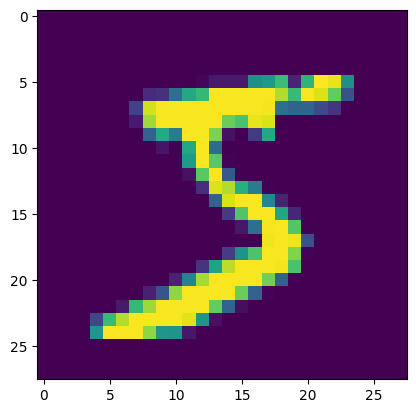

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [ ]:
single_image.max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size =(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1415 - accuracy: 0.9571 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0426 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0455 - val_accuracy: 0.9851


In [ ]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

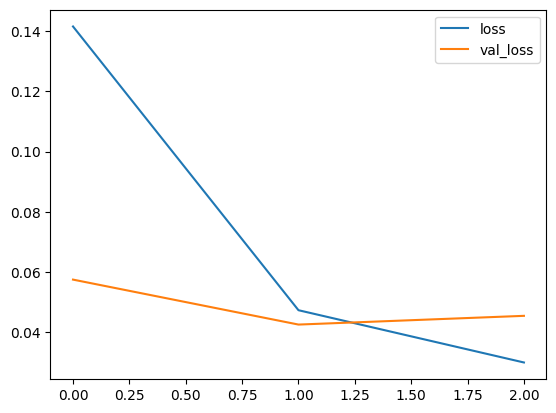

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

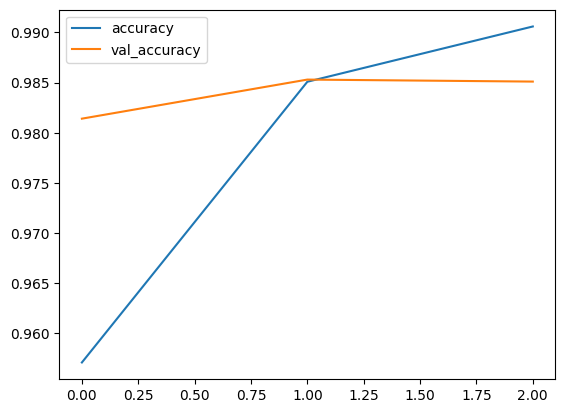

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.045518748462200165, 0.9850999712944031]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
preds = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [ ]:
preds

array([[6.6242043e-09, 6.7932771e-10, 3.1974071e-06, ..., 9.9998206e-01,
        2.1563827e-07, 2.2837942e-06],
       [5.2958281e-08, 1.6187187e-06, 9.9999803e-01, ..., 7.4759893e-10,
        1.2091594e-07, 2.7321517e-10],
       [6.8722743e-06, 9.9937671e-01, 1.4175336e-05, ..., 2.3274992e-04,
        2.8365440e-04, 3.9194774e-06],
       ...,
       [5.7952085e-12, 2.0420423e-08, 1.2670606e-11, ..., 6.2271522e-07,
        2.7086341e-07, 7.5900272e-05],
       [1.7026286e-08, 1.3890103e-10, 4.3849264e-11, ..., 3.1890210e-08,
        8.5864047e-04, 1.0934090e-08],
       [4.8458837e-08, 4.2102734e-08, 5.1085692e-08, ..., 1.8158308e-12,
        9.9552295e-09, 2.9591884e-10]], dtype=float32)

In [ ]:
predictions= model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

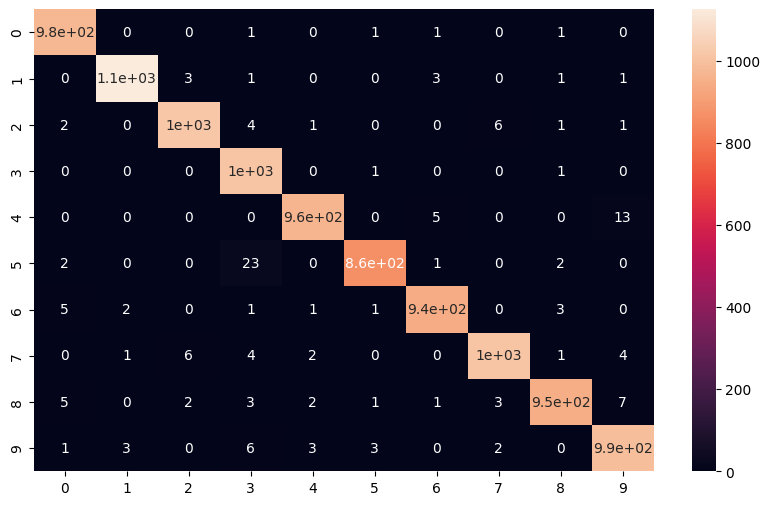

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)